### Olympics Exploratory Data Analysis Project

Exploratory Data Analysis (EDA) is a vital part of datascience. It helps us gain insight into data, recognize relationships, detect anomalies, and identify important trends. 

Objective:
The primary objective of this analysis is to uncover insightful statistics and glean meaningful insights about the Olympic Games. By meticulously examining various aspects of the dataset, including participating countries, athletes, sports events, and medal outcomes.



This notebook presents a thorough examination of the olympics dataset, delving into the rich tapestry of data encompassing the games held until the year 2012. Through meticulous analysis, I aim to unearth compelling statistics and insights that illuminate the dynamics of the Olympic Games. By scrutinizing various facets of the dataset, including participating countries, athletes, sports events, and medal outcomes, I endeavor to unravel the stories and trends woven into the fabric of Olympic history. my exploration encompasses both Summer and Winter Games, offering a comprehensive understanding of the global sporting spectacle.


In [ ]:
Importing neccesary libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Importing Olympics Dataset from kaggle.com

In [7]:
data=pd.read_csv('athlete_events.csv',index_col=0)
data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
Basic summarization of data

In [3]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB
None
(271116, 14)


There are total 271116 rows and 14 columns in our dataset.The datatype of features are float and object data type,
The feature NOC is National Olympic Committee.That is a 

 Descriptive statistics of dataset.By default describe function is applied on all numerical features.

In [4]:
data.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


Minimum age of athelete is 10.Maximum is 97,mean age is 25.5 years,There is large difference between the 75 percentile and the maximum age hence there is chance of presence of an outlier in age column

Minimum height is 127 cm, maximum height is 226 cm,mean height of Athelete is 175 cms. 

Minimum weight of athelete is 25 kgs, maximum weight of athelete is 214 kgs.Mean weight of all athelets is 70.7 kgs.



### Checking for null values

In [8]:
data.isna().sum()


Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

There are missing values present in features Age,Height,Weight and medals(obviously)

In [9]:
data.Event.unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

In [10]:
data.duplicated().sum()
# we will not drop duplicated values beacuse that may be actually significant with respect to analysis.

1385

In [11]:
data.nunique() 

Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

This shows number of all unique values present in dataset

### Handling Missing Values

In [12]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Height'].fillna(data['Height'].mean(),inplace=True)
data['Weight'].fillna(data['Weight'].mean(),inplace=True)

Checking again for any null values present

In [13]:
data.isna().sum()

Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

###  What is distribution of Athelets with respect to Sex?

In [14]:
data.Sex.value_counts()

Sex
M    196594
F     74522
Name: count, dtype: int64

We can see more number of male participants compared women

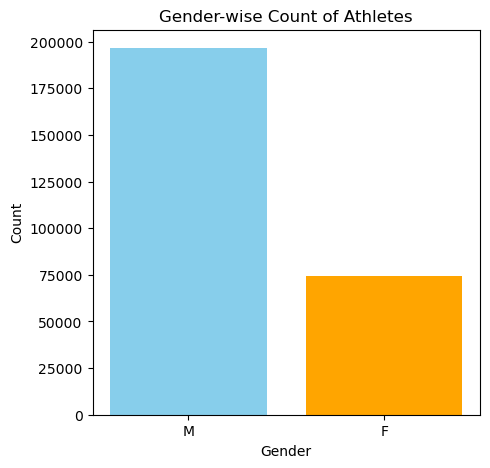

In [15]:
plt.figure(figsize=(5, 5))
gender_counts = data['Sex'].value_counts()
bars = plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'orange'])  # Specify colors for each bar

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender-wise Count of Athletes')


plt.show()

### Number of Athelets Male and Female Participating in olympic Games over the years 

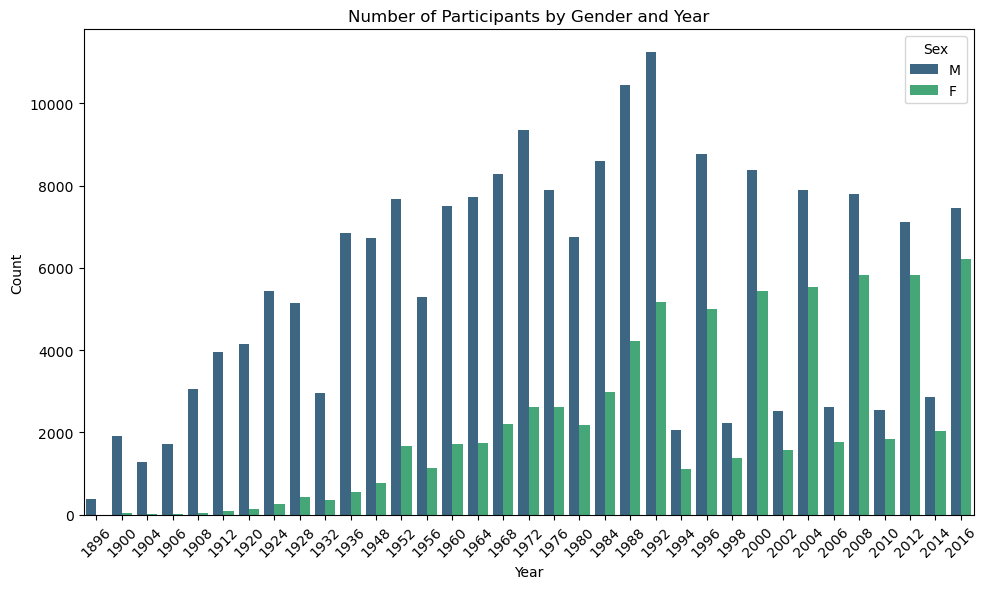

In [16]:
groupbyGender = data.groupby(['Year', 'Sex'])['Sport'].count().reset_index().rename(columns={"Sport": "count"})

# Plotting
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Year', y='count', hue='Sex', data=groupbyGender, palette='viridis')
plt.title('Number of Participants by Gender and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see in initial stage there are no women participants.After 1920's women started participating which increased with the coming years and later after 1992 we can see a consistent count of women athelets.
Maximum participation of male athelets can be seen in the year  1992

### What is distribution of Athelets with respect to Age?

In [17]:
data.Age.describe()

count    271116.000000
mean         25.556898
std           6.280857
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

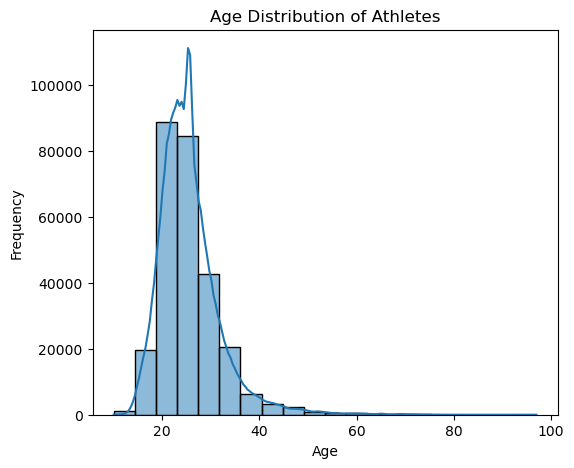

In [18]:
plt.figure(figsize=(6,5))
sns.histplot(data['Age'],bins=20,kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Athletes')
plt.show()

Insight: Most Athelet's age is between 20 years to 30 years 

In [19]:
data.Age.value_counts()

Age
23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
77.0        2
84.0        1
96.0        1
10.0        1
97.0        1
Name: count, Length: 75, dtype: int64

### Which are the countries with highest number of participating athelets

In [20]:
data.Team.value_counts().head()

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

insight: United States ranks first in participating(number of athelets) followed by France and Great Britain

### What is the number of athelets from different countries

In [21]:
data.groupby('Team')['Name'].nunique().sort_values(ascending=False).head(40)

Team
United States     9114
France            5777
Great Britain     5758
Italy             4688
Germany           4569
Canada            4546
Japan             3981
Australia         3766
Sweden            3613
Poland            2932
Netherlands       2862
Soviet Union      2858
Switzerland       2707
Hungary           2646
Spain             2597
China             2437
Russia            2322
Finland           2275
South Korea       2250
Austria           2209
Czechoslovakia    2044
Norway            2042
Brazil            2009
Belgium           1972
Denmark           1853
Argentina         1791
Romania           1748
West Germany      1638
Greece            1549
Mexico            1532
Bulgaria          1471
New Zealand       1317
East Germany      1300
Cuba              1276
Yugoslavia        1256
Ukraine           1109
Egypt              990
South Africa       946
India              874
Turkey             805
Name: Name, dtype: int64

### Number of countries with most medals

In [22]:
data[data['Medal'].notnull()]['Team'].value_counts().head()

Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64

### Number of events in different Olympics games or seasons

In [23]:
data.groupby('Year')['Event'].nunique()

Year
1896     43
1900     90
1904     95
1906     74
1908    109
1912    107
1920    158
1924    148
1928    136
1932    145
1936    167
1948    175
1952    171
1956    175
1960    177
1964    197
1968    207
1972    228
1976    235
1980    241
1984    260
1988    283
1992    314
1994     61
1996    271
1998     68
2000    300
2002     78
2004    301
2006     84
2008    302
2010     86
2012    302
2014     98
2016    306
Name: Event, dtype: int64

### Events with the highest number of participants

In [24]:
data.Event.value_counts()

Event
Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Croquet Mixed Doubles                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Target Archery, 33 metres, Individual       2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: count, Length: 765, dtype: int64

### Distribution of medals (gold, silver, bronze) across different countries

In [25]:
data.groupby(['NOC', 'Medal']).size().unstack(fill_value=0).head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,4
ANZ,5,20,4
ARG,91,91,92


### what is count of gold,bronze and silver medals per year?

In [26]:
# Filter data for gold, silver, and bronze medals
gold_medals = data[data['Medal'] == 'Gold']
silver_medals = data[data['Medal'] == 'Silver']
bronze_medals = data[data['Medal'] == 'Bronze']

# Group by year and count the number of each type of medal for each year
gold_counts_by_year = gold_medals['Year'].value_counts().sort_index()
silver_counts_by_year = silver_medals['Year'].value_counts().sort_index()
bronze_counts_by_year = bronze_medals['Year'].value_counts().sort_index()

# Combine the counts into a single DataFrame
medal_counts_by_year = pd.DataFrame({
    'Gold': gold_counts_by_year,
    'Silver': silver_counts_by_year,
    'Bronze': bronze_counts_by_year
})
print("Medal counts per year:")
print(medal_counts_by_year)

Medal counts per year:
      Gold  Silver  Bronze
Year                      
1896    62      43      38
1900   201     228     175
1904   173     163     150
1906   157     156     145
1908   294     281     256
1912   326     315     300
1920   493     448     367
1924   332     319     311
1928   275     267     281
1932   261     246     232
1936   348     347     330
1948   330     332     325
1952   351     335     347
1956   353     342     348
1960   359     342     357
1964   408     406     401
1968   425     410     421
1972   474     455     485
1976   508     505     518
1980   529     531     542
1984   571     551     576
1988   607     601     637
1992   663     657     710
1994   110     109     112
1996   608     605     629
1998   145     145     150
2000   663     661     680
2002   162     157     159
2004   664     660     677
2006   176     175     175
2008   671     667     710
2010   174     175     171
2012   632     630     679
2014   202     197     198
2016 

We can see the distribution of medal counts with respect to year

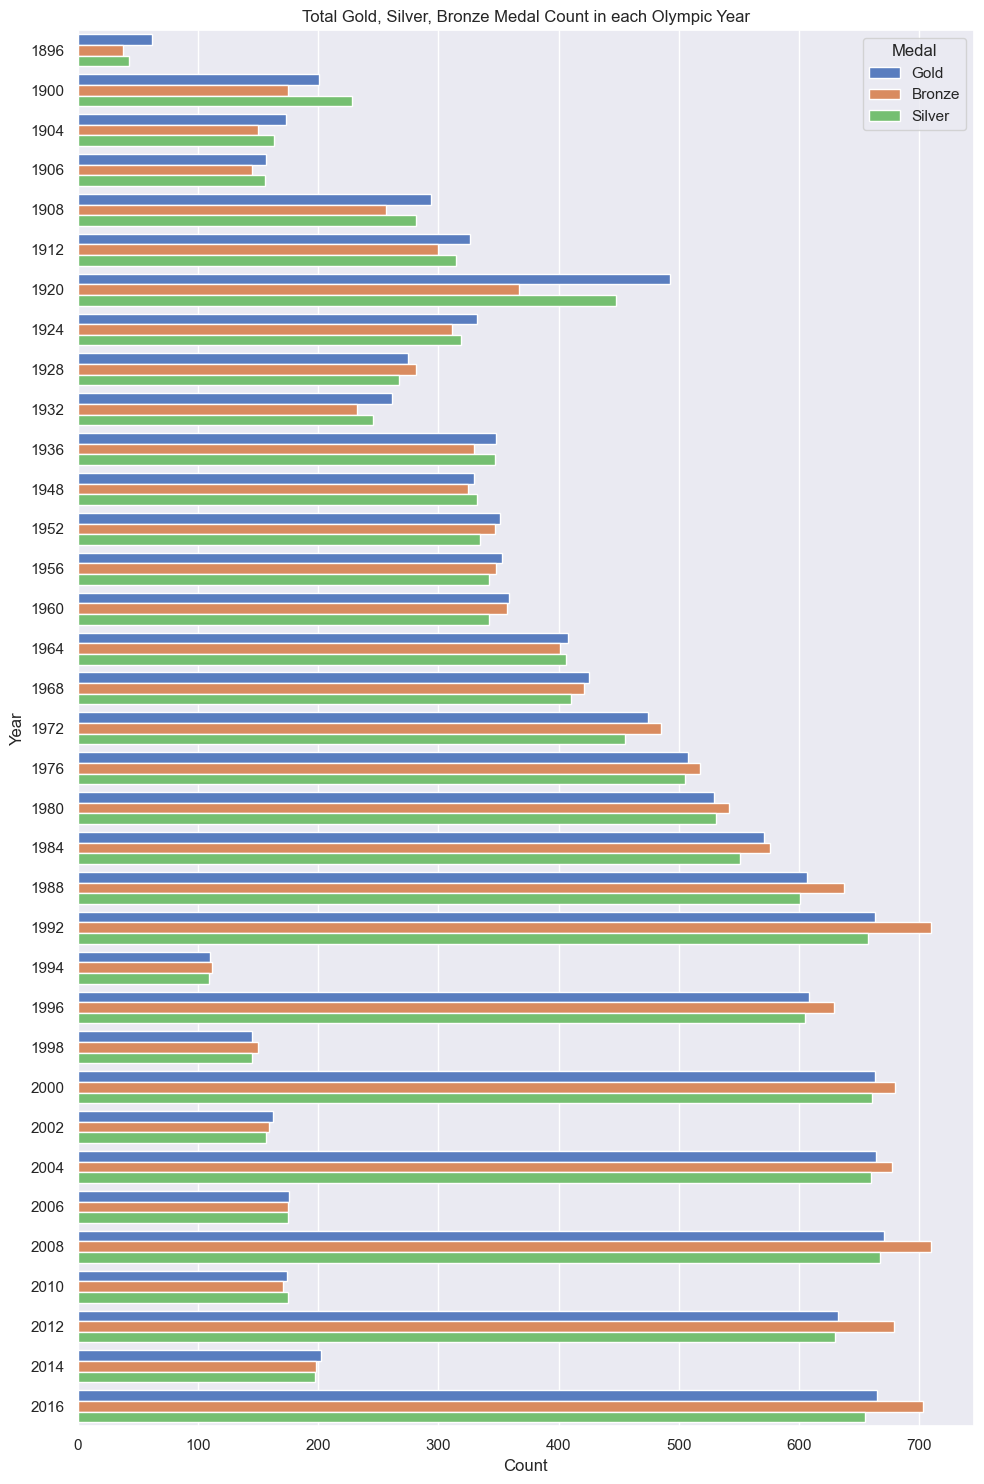

In [27]:
# Set style and palette
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

# Filter data for non-null medals
medal_data = data[data['Medal'].notnull()]

# Plotting
plt.figure(figsize=(10, 15))
sns.countplot(y='Year', hue='Medal', data=medal_data)
plt.title('Total Gold, Silver, Bronze Medal Count in each Olympic Year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.legend(title='Medal')
plt.tight_layout()
plt.savefig("TotalGoldSilver.png")
plt.show()

The year in which we can see maximum number of medals won is 1992 and 2008, Bronze medal count is the highest

### What are average heights and weights of athletes in different sports?

In [28]:
data.groupby('Sport')[['Height', 'Weight']].mean().head()

,Height,Weight
Sport,,
Aeronautics,175.338970,70.702393
Alpine Skiing,173.999252,71.684645
Alpinism,175.338970,70.702393
Archery,173.559066,70.143818
Art Competitions,175.327511,70.772926


Correlation between an athlete's age and their likelihood of winning a medal

In [29]:
data.groupby('Age')['Medal'].count().head(60)

Age
10.000000       1
11.000000       1
12.000000       6
13.000000      16
14.000000      75
15.000000     196
16.000000     350
17.000000     534
18.000000     860
19.000000    1369
20.000000    2004
21.000000    2684
22.000000    3159
23.000000    3395
24.000000    3289
25.000000    3124
25.556898     732
26.000000    2924
27.000000    2690
28.000000    2335
29.000000    1941
30.000000    1599
31.000000    1250
32.000000    1011
33.000000     792
34.000000     640
35.000000     485
36.000000     383
37.000000     277
38.000000     245
39.000000     188
40.000000     203
41.000000     141
42.000000     121
43.000000     101
44.000000     117
45.000000      75
46.000000      78
47.000000      55
48.000000      52
49.000000      49
50.000000      33
51.000000      22
52.000000      35
53.000000      19
54.000000      26
55.000000      14
56.000000      20
57.000000       7
58.000000      12
59.000000       6
60.000000      12
61.000000       6
62.000000       0
63.000000       9
64.000

range of age 19-32 shows highest liklihood of winning medal

### Number of participating athletes over time

In [30]:
data.groupby('Year')['Name'].nunique()

Year
1896      176
1900     1220
1904      650
1906      841
1908     2024
1912     2409
1920     2675
1924     3565
1928     3702
1932     2174
1936     5138
1948     5068
1952     5621
1956     4166
1960     6012
1964     6226
1968     6711
1972     8111
1976     7194
1980     6323
1984     8057
1988     9860
1992    11172
1994     1738
1996    10324
1998     2178
2000    10639
2002     2397
2004    10537
2006     2494
2008    10880
2010     2535
2012    10502
2014     2744
2016    11174
Name: Name, dtype: int64

### Emerging sports or events that have gained popularity

In [105]:
data.groupby(['Year', 'Sport'])['Event'].nunique().sort_values(ascending=False)

Year  Sport              
2008  Athletics              47
2012  Athletics              47
2016  Athletics              47
2004  Athletics              46
2000  Athletics              46
                             ..
1952  Nordic Combined         1
1984  Rhythmic Gymnastics     1
      Nordic Combined         1
      Ice Hockey              1
1908  Polo                    1
Name: Event, Length: 906, dtype: int64

Atheletics is a sport which has gained popularity over years more as compared to other events

### Number of Distinct cities hosted the games 

In [106]:
data["City"].nunique()

42

### Which cities hosted the Olympics more than once ?

In [32]:
city_counts = data.groupby('City')['Year'].nunique()
cities_hosted_more_than_once = city_counts[city_counts > 1]
cities_hosted_more_than_once


City
Athina          3
Innsbruck       2
Lake Placid     2
London          3
Los Angeles     2
Paris           2
Sankt Moritz    2
Stockholm       2
Name: Year, dtype: int64

We can observe Athina,Innsbruck ,Lake Placid,London,Los Angeles,Paris,Sankt Moritz,Stockholm are the cities where olympics was hosted more than once

In [33]:
athlete_medal_counts = data.groupby('Name')['Medal'].count()
most_successful_athletes = athlete_medal_counts.sort_values(ascending=False).head(10)
most_successful_athletes

Name
Michael Fred Phelps, II                 28
Larysa Semenivna Latynina (Diriy-)      18
Nikolay Yefimovich Andrianov            15
Takashi Ono                             13
Borys Anfiyanovych Shakhlin             13
Ole Einar Bjrndalen                     13
Edoardo Mangiarotti                     13
Natalie Anne Coughlin (-Hall)           12
Sawao Kato                              12
Dara Grace Torres (-Hoffman, -Minas)    12
Name: Medal, dtype: int64

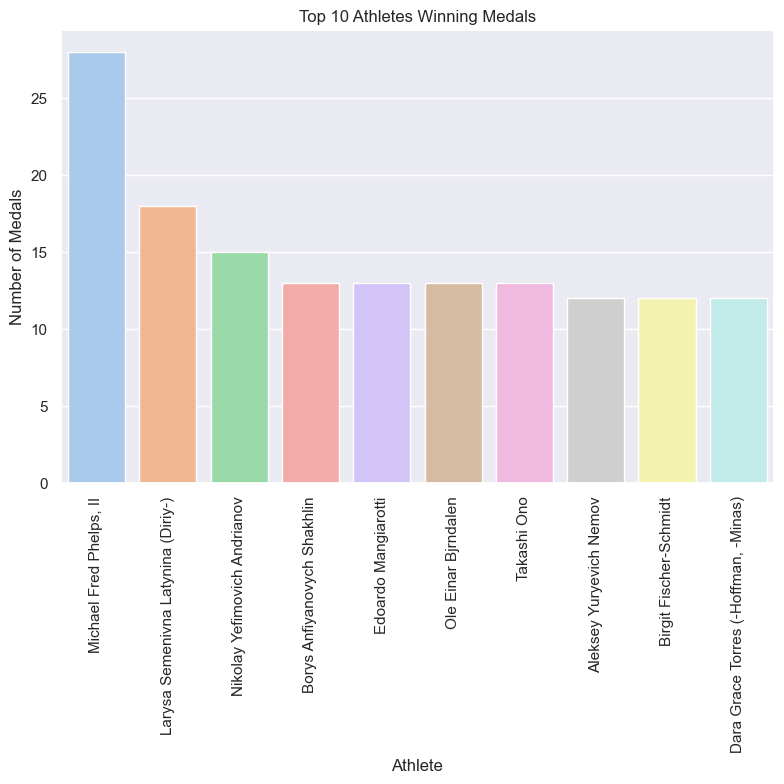

In [34]:
# Grouping data by athlete and counting the number of medals
athlete_medal_counts = data.groupby('Name')['Medal'].count().nlargest(10).reset_index()

# Plotting
plt.figure(figsize=(8, 8))
sns.barplot(x='Name', y='Medal', data=athlete_medal_counts, palette='pastel')
plt.title('Top 10 Athletes Winning Medals')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Michael Fred Phelps, II has highest number of medal count in the entire history with total medal count as 28

### What is the distribution of Number of Countries Participation Level in Olympics over the History

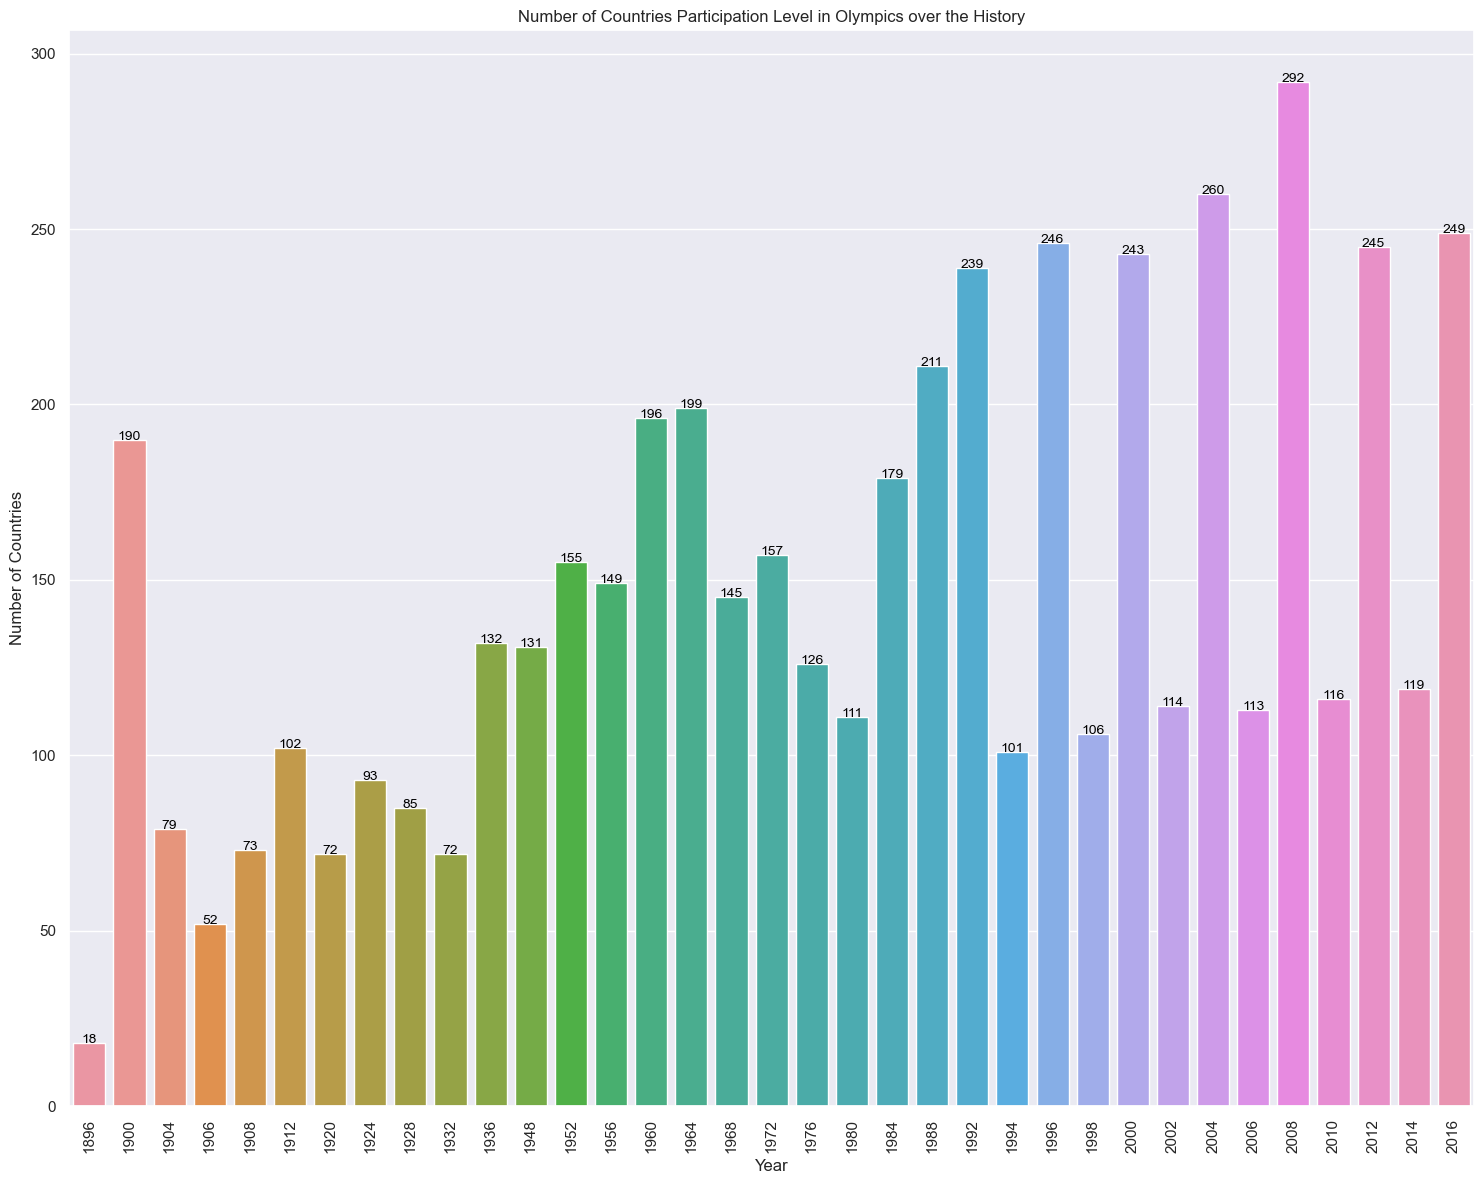

In [35]:
# Grouping data by year and counting unique countries
YearVsCountry = data.groupby('Year')['Team'].nunique().reset_index()

# Plotting
plt.figure(figsize=(15, 12))
ax = sns.barplot(x='Year', y='Team', data=YearVsCountry)
plt.xlabel("Year")
plt.ylabel("Number of Countries")
plt.title("Number of Countries Participation Level in Olympics over the History")
plt.xticks(rotation=90)

# Displaying values on bars
for index, row in YearVsCountry.iterrows():
    ax.text(index, row['Team'], row['Team'], color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

insights: in 1896 number of countries that participated were only 18.which gradually increased over years.we can see year 2008 has most number of countries participated.During World War I and World War II, there may be significant dips in participation due to the disruption of international relations and the suspension of the Olympic Games.Following the end of World War II, there may be a rebound in participation as countries recover from the devastation of war and seek to rejoin the international community. In more recent years, there may be fluctuations in participation driven by factors such as globalization, technological advancements, and changes in geopolitical dynamics.
    

### How many medals have been won in total in the Olympics dataset, and what is the distribution of these medals across different years?

In [38]:
# Total medals won year-wise
medals_by_year = data.groupby('Year')['Medal'].count().reset_index()
medals_by_year.columns = ['Year', 'Total Medals']
print("Total Medals won year wise:")
print(medals_by_year)

# Total number of medals won in Olympics till date
total_medals_in_olympics = data['Medal'].count()
print("Total number of Medals won in Olympics till date:", total_medals_in_olympics)


Total Medals won year wise:
    Year  Total Medals
0   1896           143
1   1900           604
2   1904           486
3   1906           458
4   1908           831
5   1912           941
6   1920          1308
7   1924           962
8   1928           823
9   1932           739
10  1936          1025
11  1948           987
12  1952          1033
13  1956          1043
14  1960          1058
15  1964          1215
16  1968          1256
17  1972          1414
18  1976          1531
19  1980          1602
20  1984          1698
21  1988          1845
22  1992          2030
23  1994           331
24  1996          1842
25  1998           440
26  2000          2004
27  2002           478
28  2004          2001
29  2006           526
30  2008          2048
31  2010           520
32  2012          1941
33  2014           597
34  2016          2023
Total number of Medals won in Olympics till date: 39783


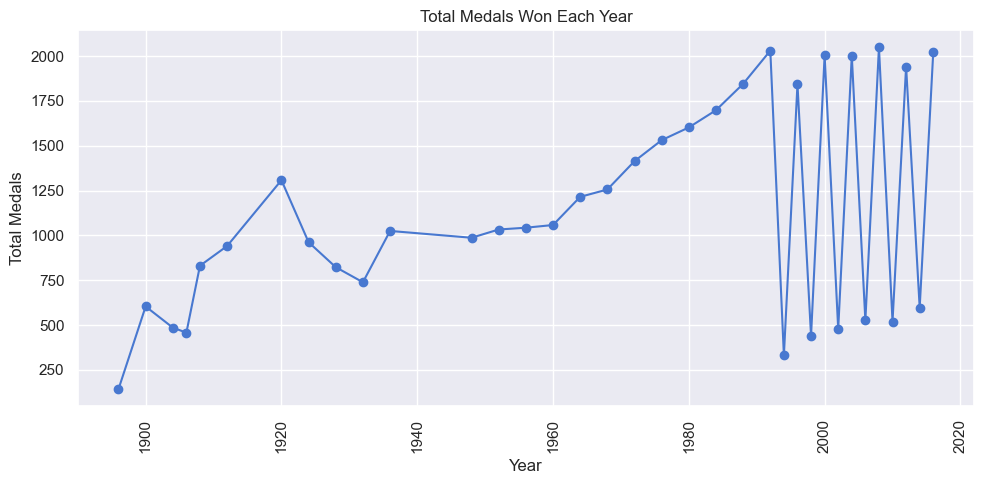

In [41]:
import matplotlib.pyplot as plt

# Total medals won year-wise
medals_by_year = data.groupby('Year')['Medal'].count().reset_index()
medals_by_year.columns = ['Year', 'Total Medals']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(medals_by_year['Year'], medals_by_year['Total Medals'], marker='o')
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.title("Total Medals Won Each Year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


we can see that in early years there is a kind of positive trend but after 1980's probably number of participants incresed and competition increased hence we can see fluctuations

Which country has won maximum gold medals?


In [42]:
gold_medals = data[data['Medal'] == 'Gold']
gold_medal_counts = gold_medals['Team'].value_counts()
max_gold_country = gold_medal_counts.idxmax()
max_gold_country

'United States'

### What is distribution of Medals Won by Male and Female Candidates in Olympics by Year

<function matplotlib.pyplot.show(close=None, block=None)>

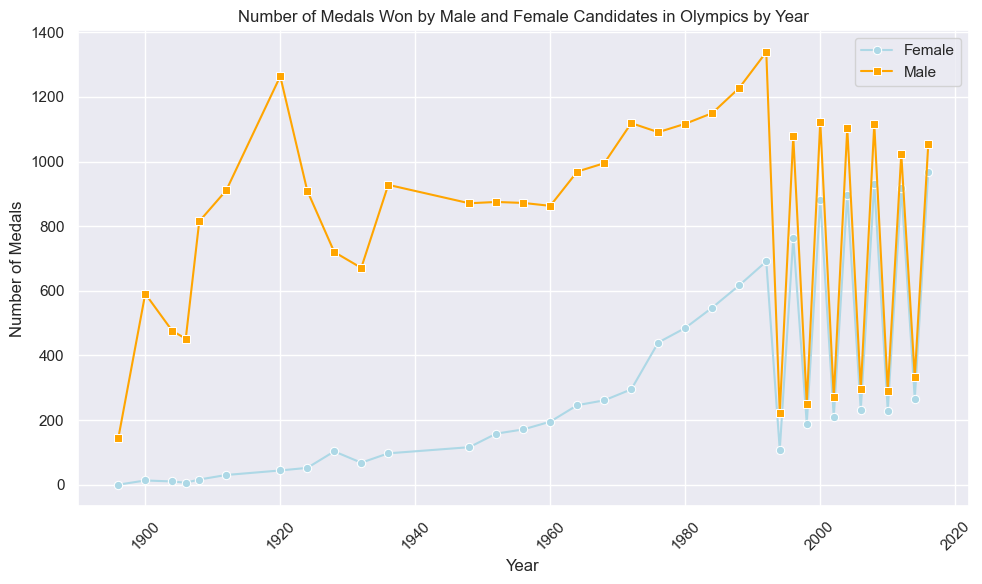

In [44]:
# Filter data for medals won by male and female candidates
medals_data = data[data['Medal'].notnull()]  # Remove rows where Medal is null
gender_medals_per_year = medals_data.groupby(['Year', 'Sex']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_medals_per_year.reset_index(), x='Year', y='F', marker='o', label='Female',color='lightblue')
sns.lineplot(data=gender_medals_per_year.reset_index(), x='Year', y='M', marker='s', label='Male',color='orange')
plt.title('Number of Medals Won by Male and Female Candidates in Olympics by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

Males Performance is more compared to female's

### Womens performance in olympic history

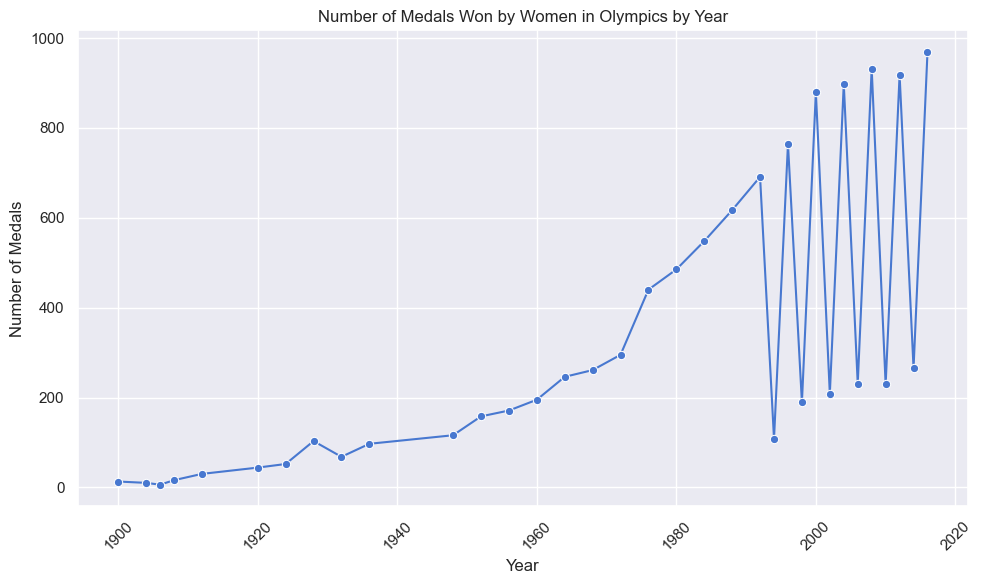

In [117]:
# Assuming you have the Olympics dataset loaded into a DataFrame called 'data'

# Filter data for female athletes who won medals
female_medals = data[(data['Sex'] == 'F') & (data['Medal'].notnull())]

# Group by year and count the number of medals won by women for each year
female_medals_per_year = female_medals.groupby('Year').size().reset_index(name='Medal Count')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=female_medals_per_year, x='Year', y='Medal Count', marker='o')
plt.title('Number of Medals Won by Women in Olympics by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Womens performance is consistent after 2000

### Percentage of women and men participating in olympics

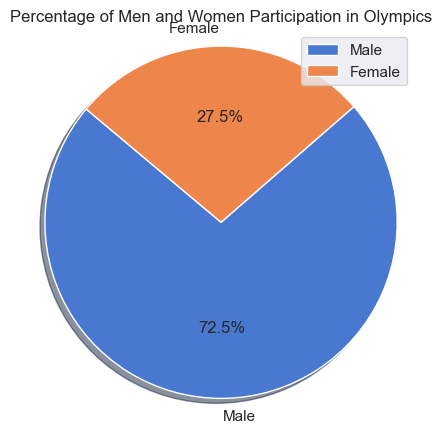

In [45]:
# Count the number of male and female athletes
gender_counts = data['Sex'].value_counts()

# Plotting
plt.figure(figsize=(5,5))
mylabels=['Male','Female']
plt.pie(gender_counts, autopct='%1.1f%%', startangle=140,shadow=True,labels=mylabels)

plt.title('Percentage of Men and Women Participation in Olympics')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()


### which country won olympic games more than 1 times?

In [142]:
# Filter data for gold medal winners
gold_medals = data[data['Medal'] == 'Gold']

# Group by country and count the number of gold medals won by each country
gold_medal_counts = gold_medals['Team'].value_counts()

# Filter countries with more than 5 gold medals
countries_more_than_1 = gold_medal_counts[ gold_medal_counts > 1 ]

# Display the countries
print("Countries that won in Olympic Games more than 1 times:")
print(countries_more_than_1)

Countries that won in Olympic Games more than 1 times:
Team
United States             2474
Soviet Union              1058
Germany                    679
Italy                      535
Great Britain              519
                          ... 
Seawanhaka Boat Club-1       2
Gem                          2
Great Britain/Germany        2
Swift                        2
Wannsee                      2
Name: count, Length: 209, dtype: int64


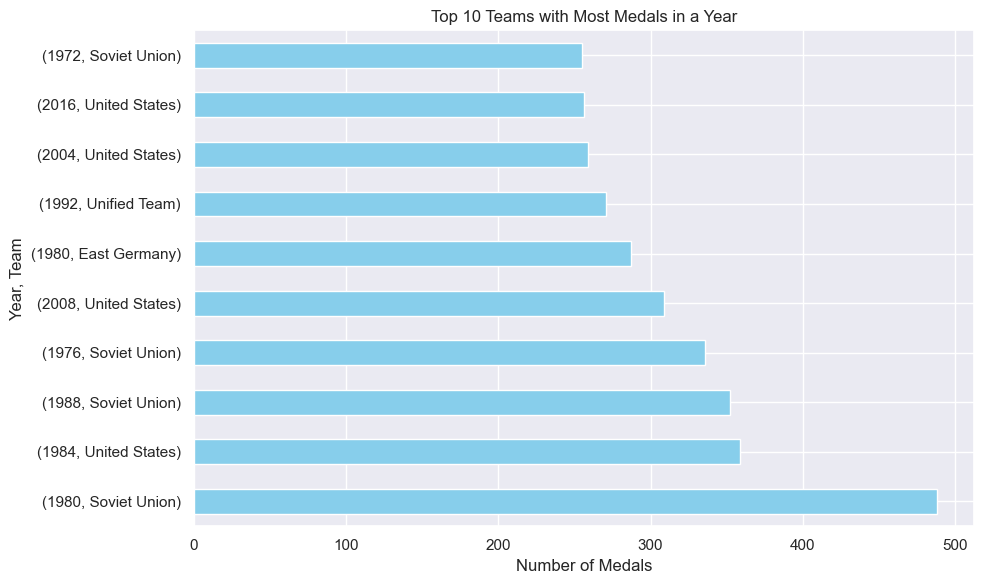

In [143]:
# Grouping data by year and team, counting the number of medals, and selecting the top 10
top_teams = data.groupby(['Year', 'Team'])['Medal'].count().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_teams.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Medals')
plt.ylabel('Year, Team')
plt.title('Top 10 Teams with Most Medals in a Year')
plt.tight_layout()
plt.show()

Soviet Union is a country with maximum numbers of medals won with respect to year 1980

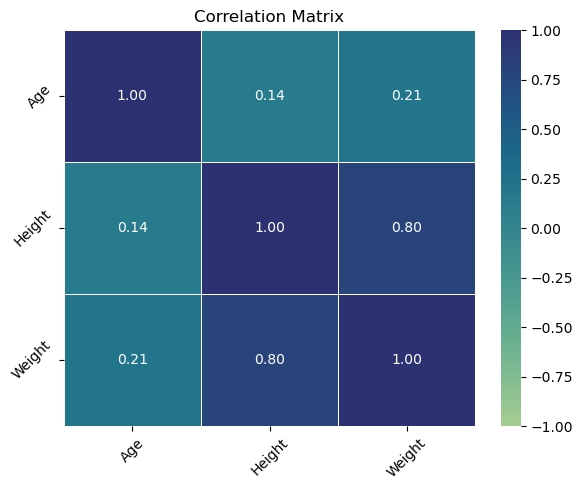

In [7]:
# Select numerical columns for correlation matrix
numerical_cols = data.select_dtypes(include=['float64'])

# Calculate correlation matrix
correlation_matrix = numerical_cols.corr()

# Plotting correlation matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix,cmap='crest', annot=True, fmt=".2f", linewidths=0.5,vmax=1,vmin=-1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Height and weight shows high correlation ,height and age shows low correlation

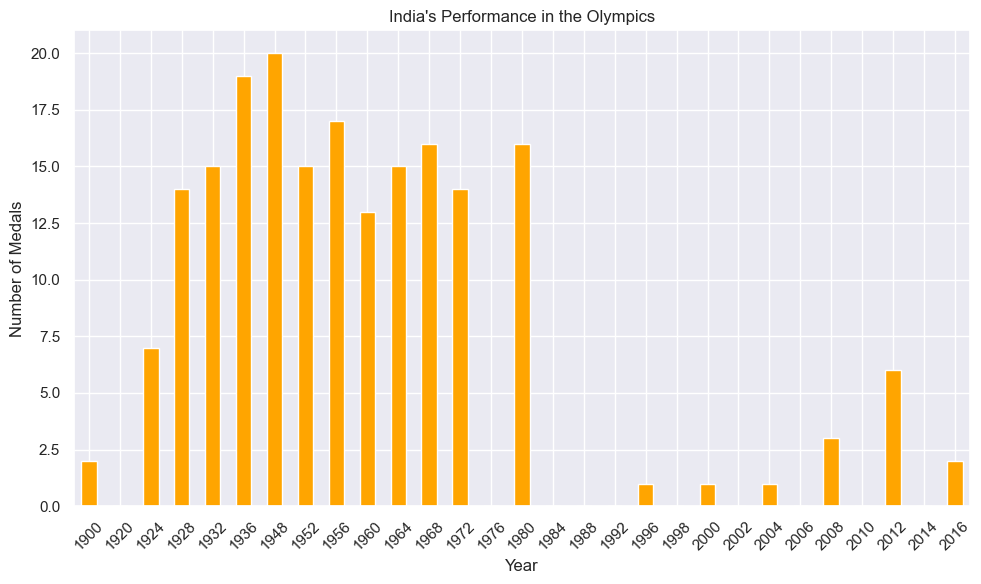

In [67]:
# Filter data for India
india_data = data[data['Team'] == 'India']

# Count the number of medals won by India over the years
medals_count_by_year = india_data.groupby('Year')['Medal'].count()

# Plotting
plt.figure(figsize=(10, 6))
medals_count_by_year.plot(kind='bar', color='orange')
plt.title("India's Performance in the Olympics")
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

India's performance can be seen drastically decreasing after 1980's

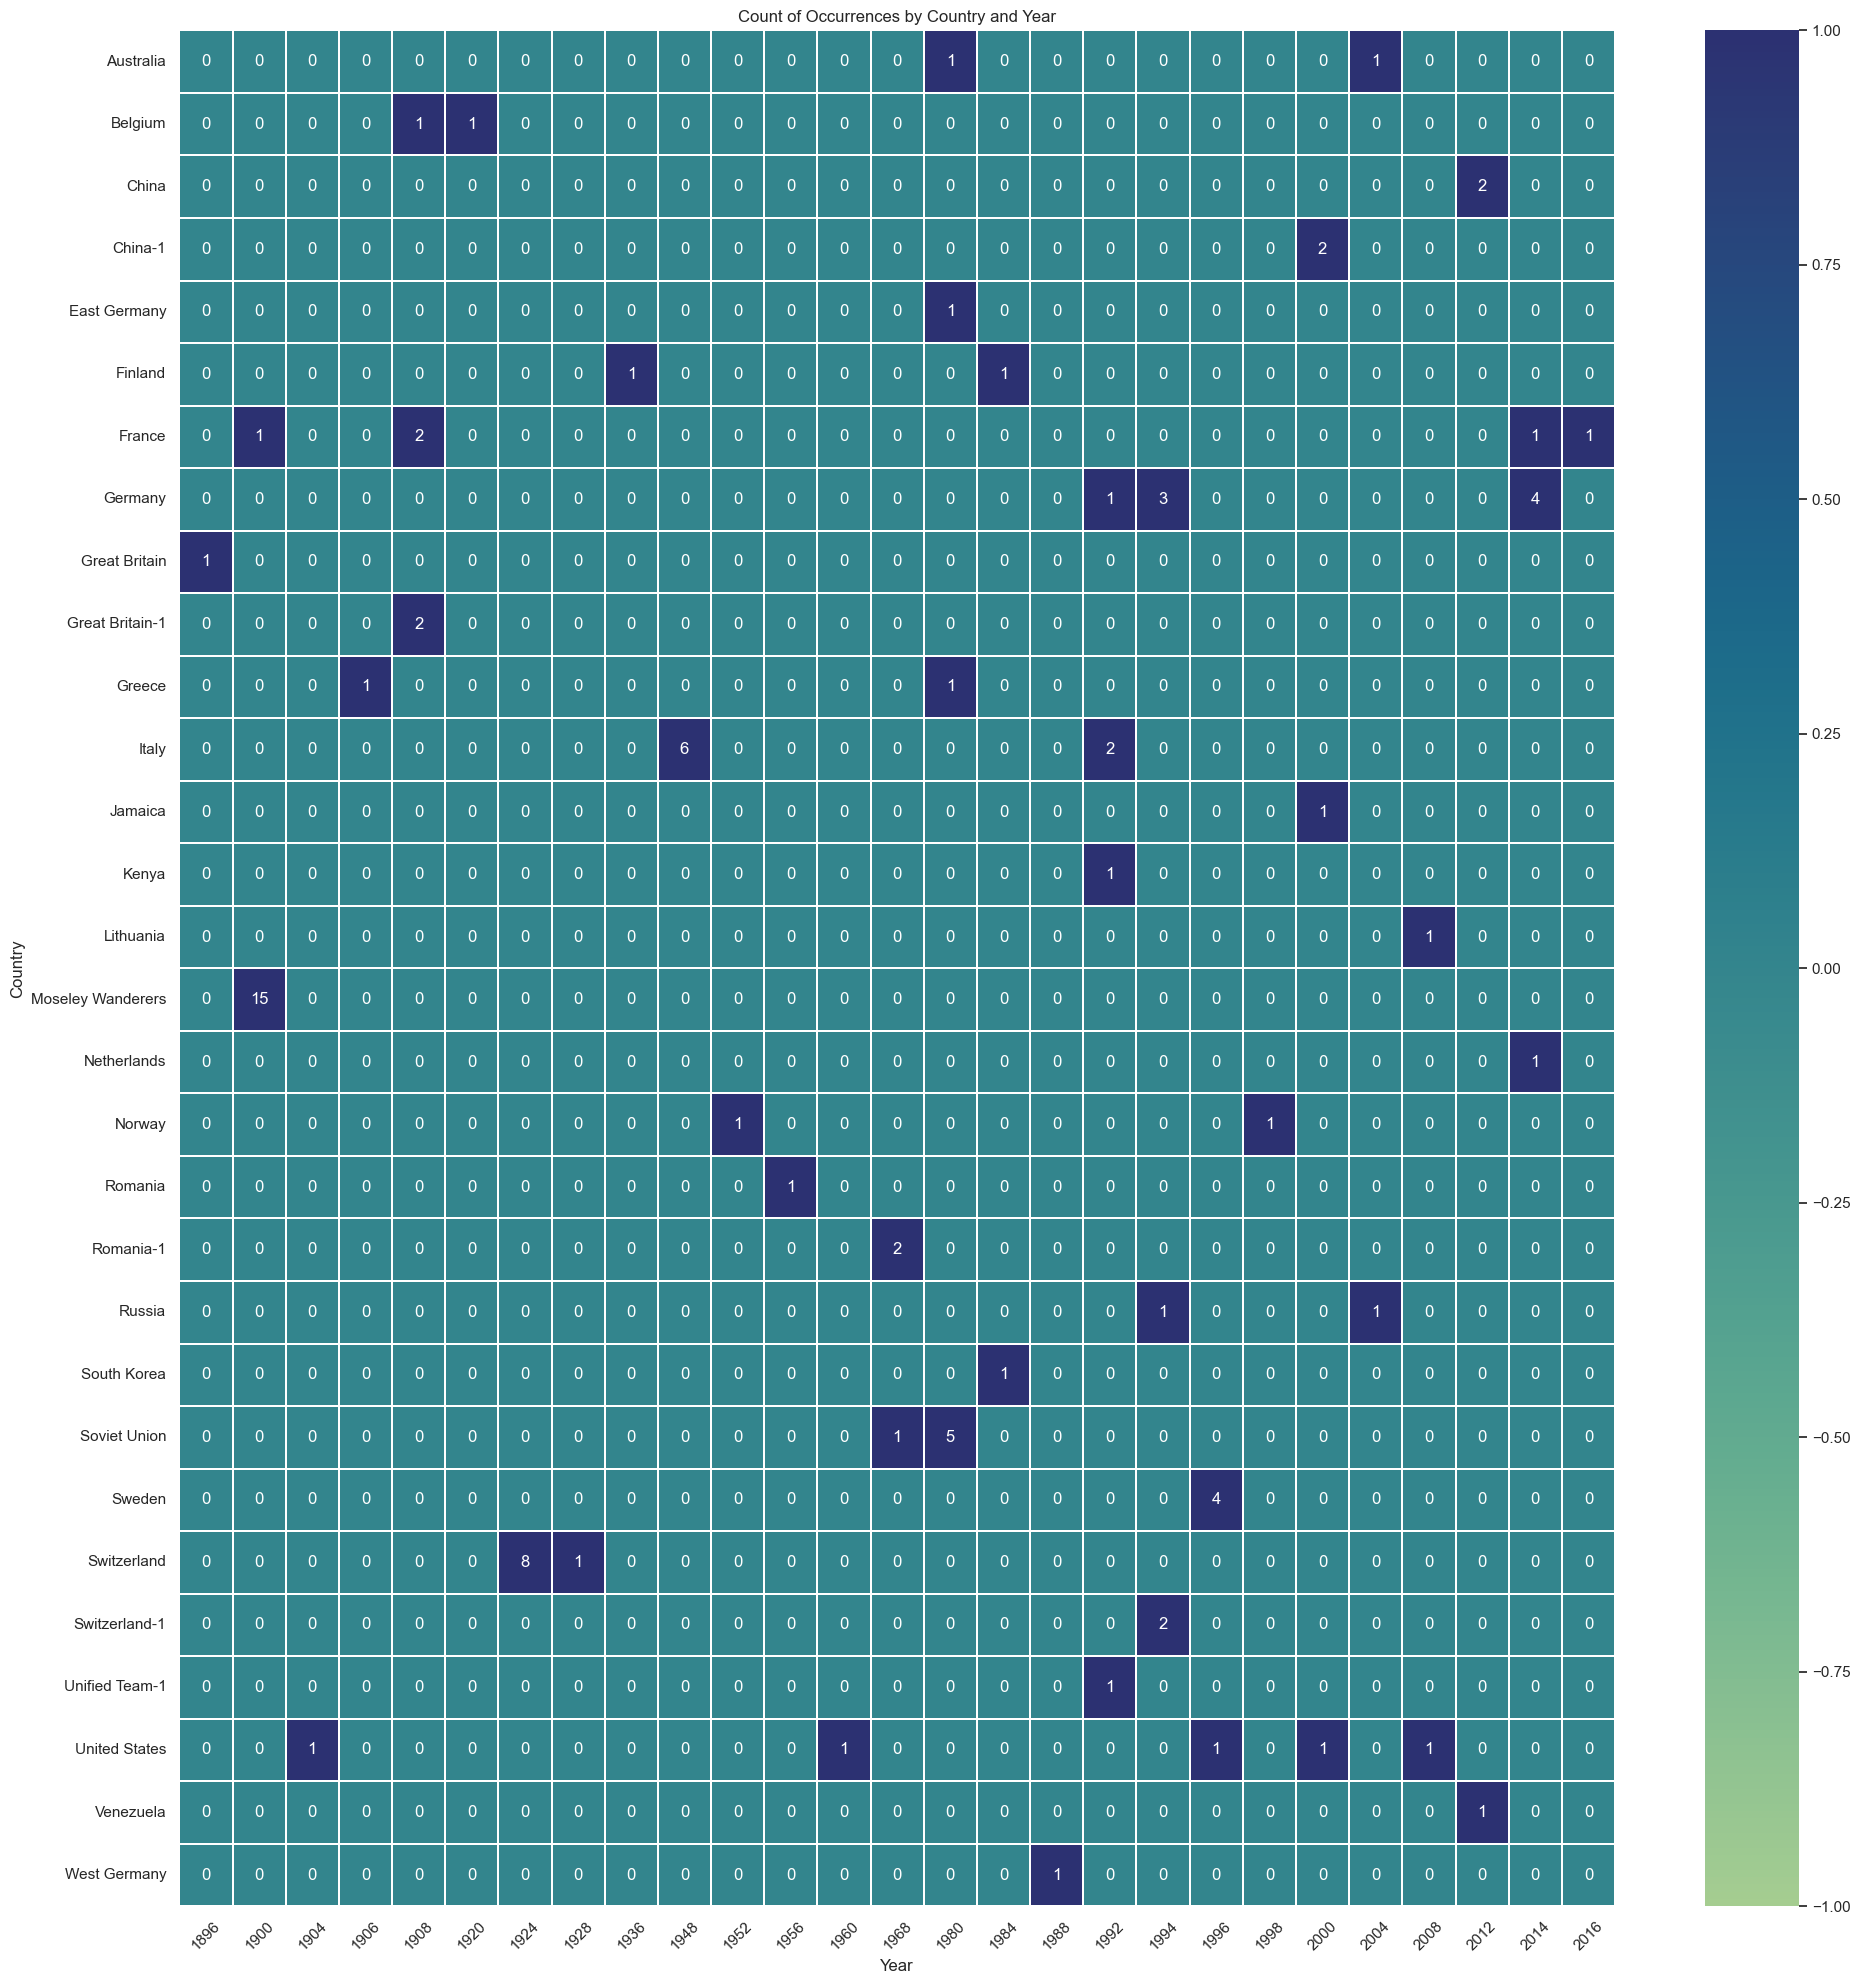

In [210]:
# Grouping data by year, country, discipline, event, medal, and gender, and counting occurrences
grouped_data = data.groupby(['Year', 'Team', 'Sport', 'Event', 'Medal', 'Sex']).size().reset_index(name='Count').sample(50)

# Creating a pivot table
pivot_table = grouped_data.pivot_table(index='Team', columns='Year', values='Count', aggfunc='sum', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='crest', linewidths=0.05,vmax=1.0,vmin=-1.0)
plt.title('Count of Occurrences by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("CountryYearHeatmap.png")
plt.show()

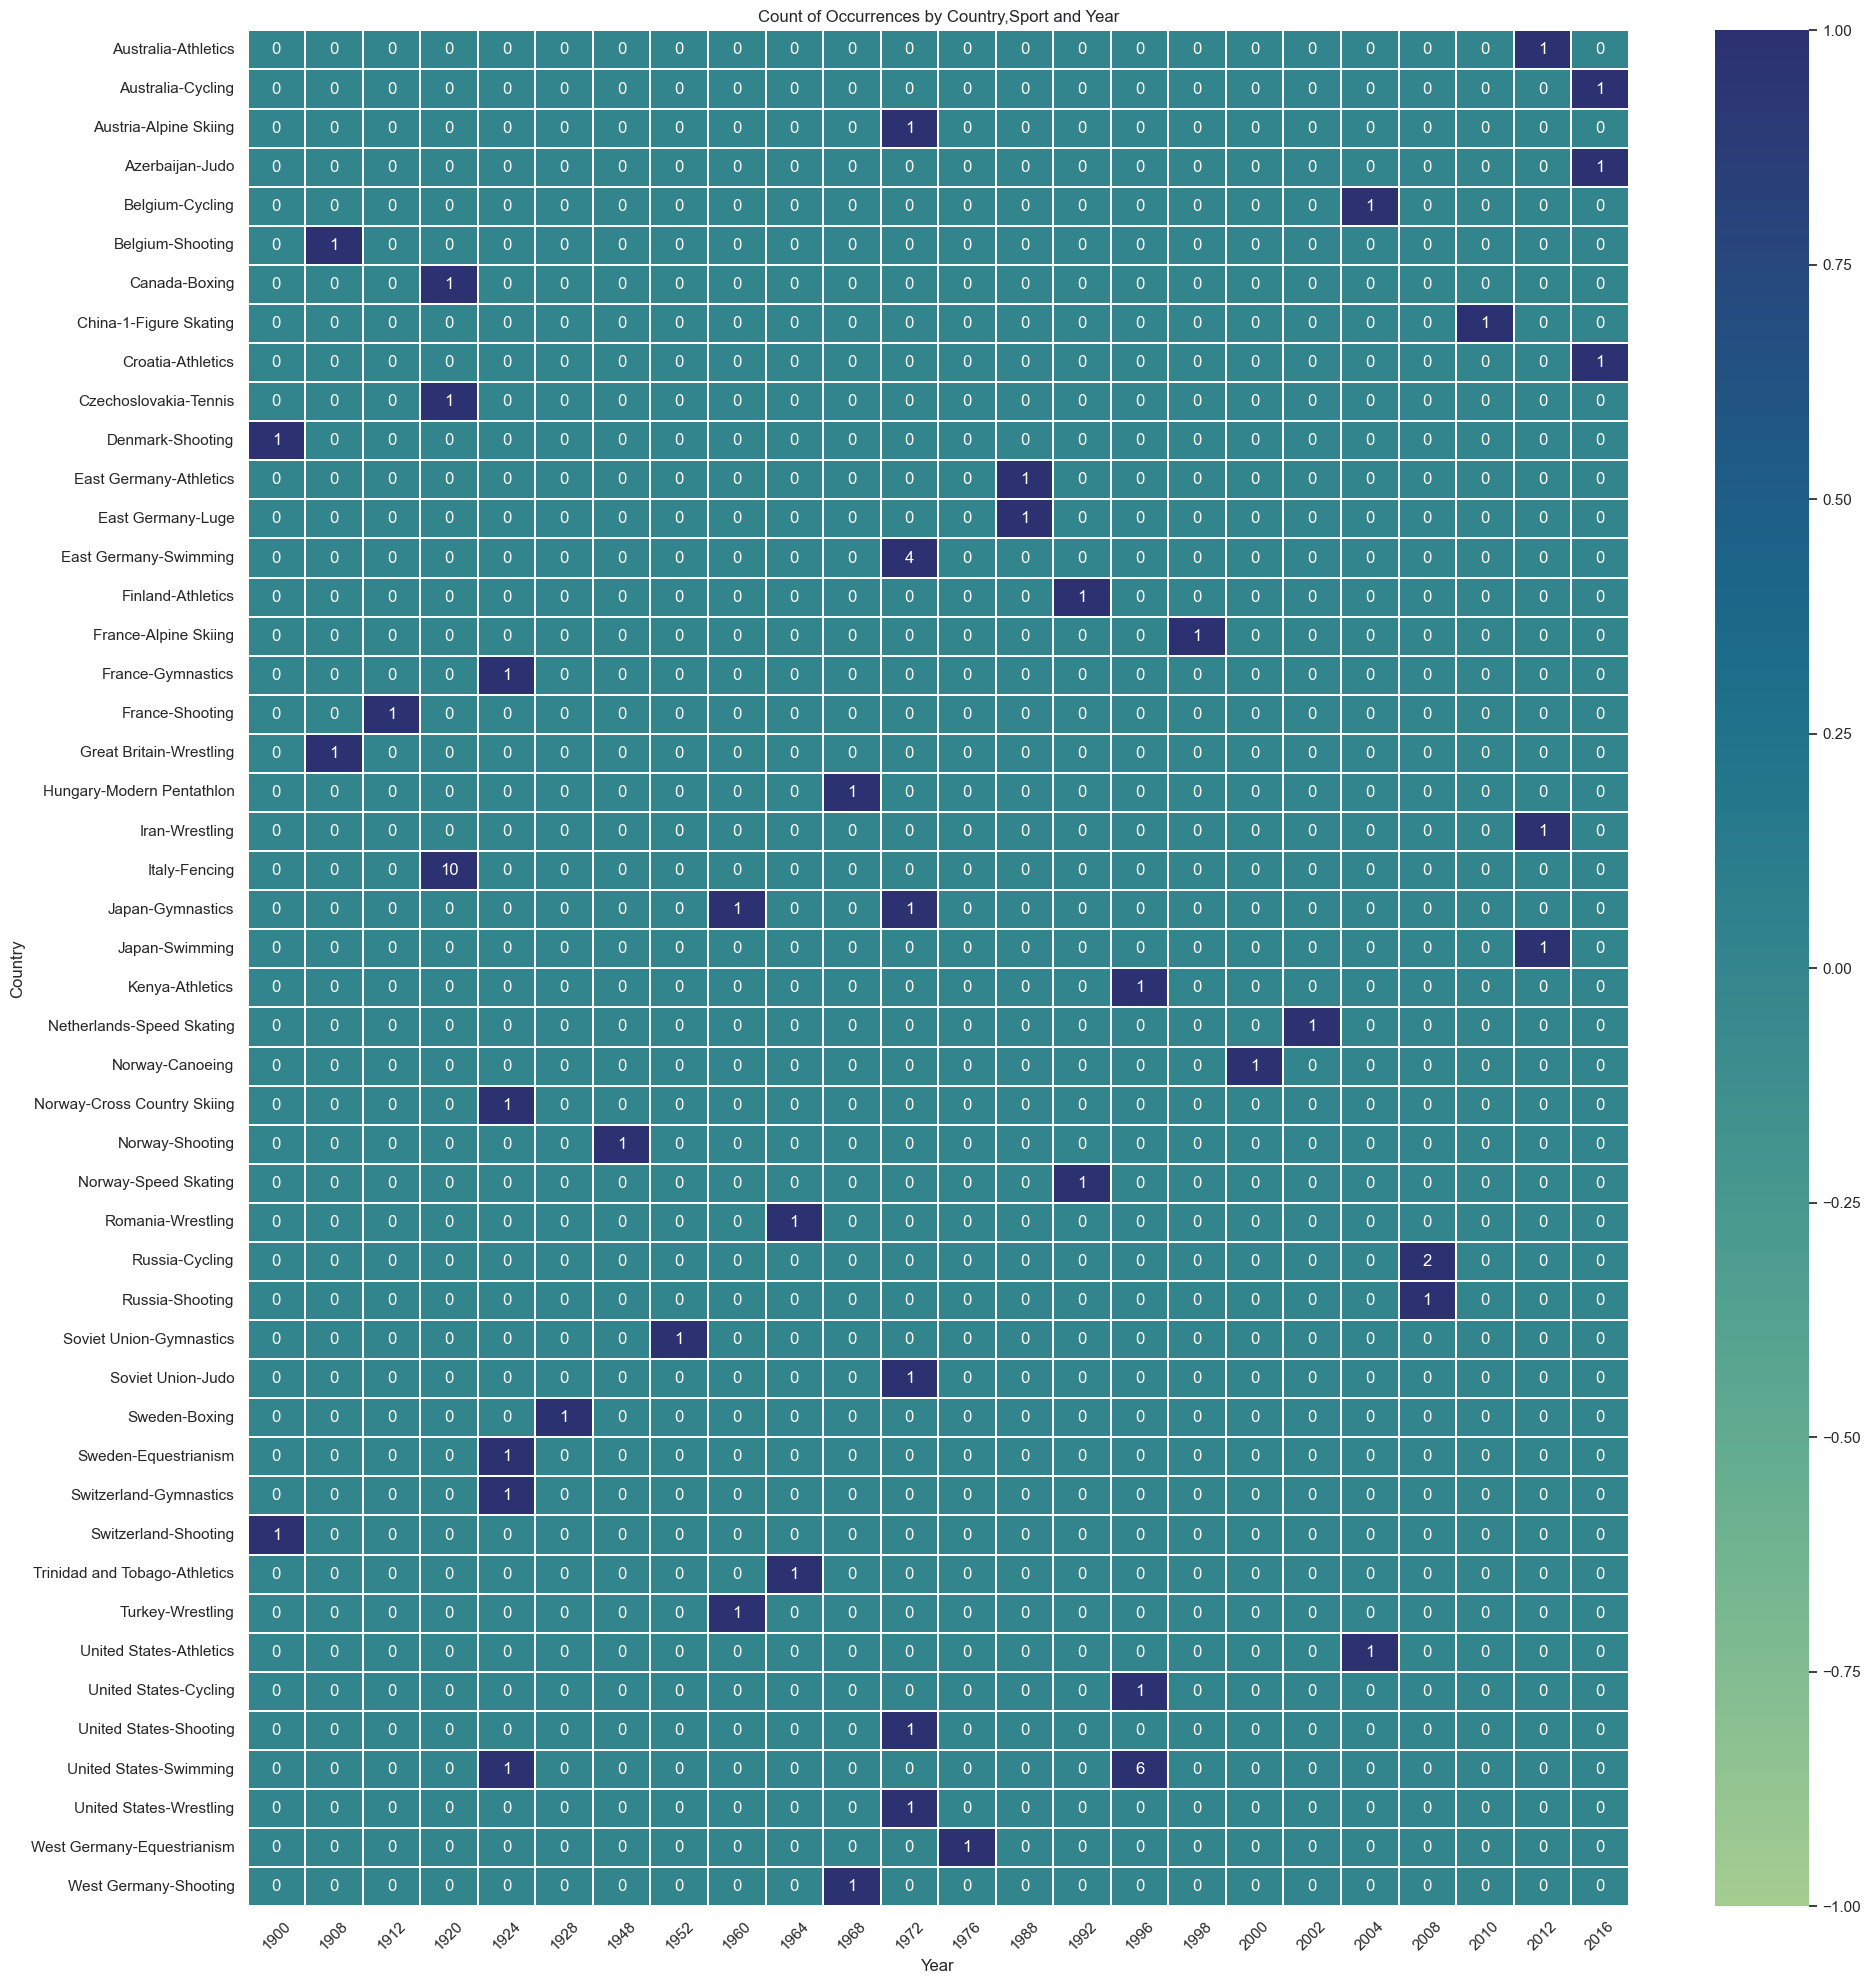

In [280]:
# Grouping data by year, country, discipline, event, medal, and gender, and counting occurrences
grouped_data = data.groupby(['Year', 'Team', 'Sport', 'Event', 'Medal', 'Sex']).size().reset_index(name='Count').sample(50)

# Creating a pivot table
pivot_table = grouped_data.pivot_table(index=['Team','Sport'], columns='Year', values='Count', aggfunc='sum', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='crest', linewidths=0.05,vmax=1.0,vmin=-1.0)
plt.title('Count of Occurrences by Country,Sport and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("CountryYearHeatmap.png")
plt.show()

the "count of occurrence" typically refers to the number of times a particular combination of variables appears in a dataset. In the context of the code provided earlier, where data is grouped by 'Year', 'Sport', and 'Team', and the count of occurrences is calculated, it means:

For example, if in the dataset there are 10 records with the year 2020, sport "Football", and team "Team A", then the count of occurrence for this combination would be 10.
This information can be useful for understanding the frequency or distribution of certain events or activities across different years and sports.

### Are there any trends in the types of sports being added or removed from the Olympics over time?

In [47]:
# Extract unique sports for each Olympic game
sports_by_year = data.groupby('Year')['Sport'].unique()

# Get years with available data
years_with_data = sorted(sports_by_year.index)

# Compare sports between consecutive Olympic games
sports_added = {}
sports_removed = {}

# Iterate over years with available data
for i, year in enumerate(years_with_data[:-1]):
    current_year_sports = set(sports_by_year[year])
    next_year_sports = set(sports_by_year[years_with_data[i + 1]])
    
    sports_added[years_with_data[i + 1]] = current_year_sports - next_year_sports
    sports_removed[years_with_data[i + 1]] = next_year_sports - current_year_sports

# Print trends
print("Trends in Sports Added:")
for year, sports in sports_added.items():
    if sports:
        print(f"{year}: {sports}")

print("\nTrends in Sports Removed:")
for year, sports in sports_removed.items():
    if sports:
        print(f"{year}: {sports}")

Trends in Sports Added:
1900: {'Weightlifting', 'Wrestling'}
1904: {'Polo', 'Shooting', 'Basque Pelota', 'Cricket', 'Sailing', 'Croquet', 'Rugby', 'Equestrianism'}
1906: {'Archery', 'Golf', 'Roque', 'Boxing', 'Lacrosse', 'Water Polo'}
1908: {'Weightlifting'}
1912: {'Figure Skating', 'Polo', 'Hockey', 'Archery', 'Motorboating', 'Boxing', 'Jeu De Paume', 'Lacrosse', 'Rugby', 'Racquets'}
1924: {'Archery', 'Tug-Of-War', 'Hockey'}
1928: {'Polo', 'Shooting', 'Military Ski Patrol', 'Curling', 'Rugby', 'Tennis', 'Alpinism'}
1932: {'Football', 'Skeleton'}
1948: {'Alpinism', 'Polo', 'Handball', 'Aeronautics'}
1952: {'Art Competitions', 'Skeleton'}
1960: {'Bobsleigh'}
1968: {'Judo'}
1994: {'Hockey', 'Canoeing', 'Volleyball', 'Synchronized Swimming', 'Boxing', 'Handball', 'Modern Pentathlon', 'Tennis', 'Athletics', 'Baseball', 'Archery', 'Weightlifting', 'Table Tennis', 'Diving', 'Fencing', 'Shooting', 'Sailing', 'Judo', 'Swimming', 'Football', 'Water Polo', 'Equestrianism', 'Rhythmic Gymnastics',

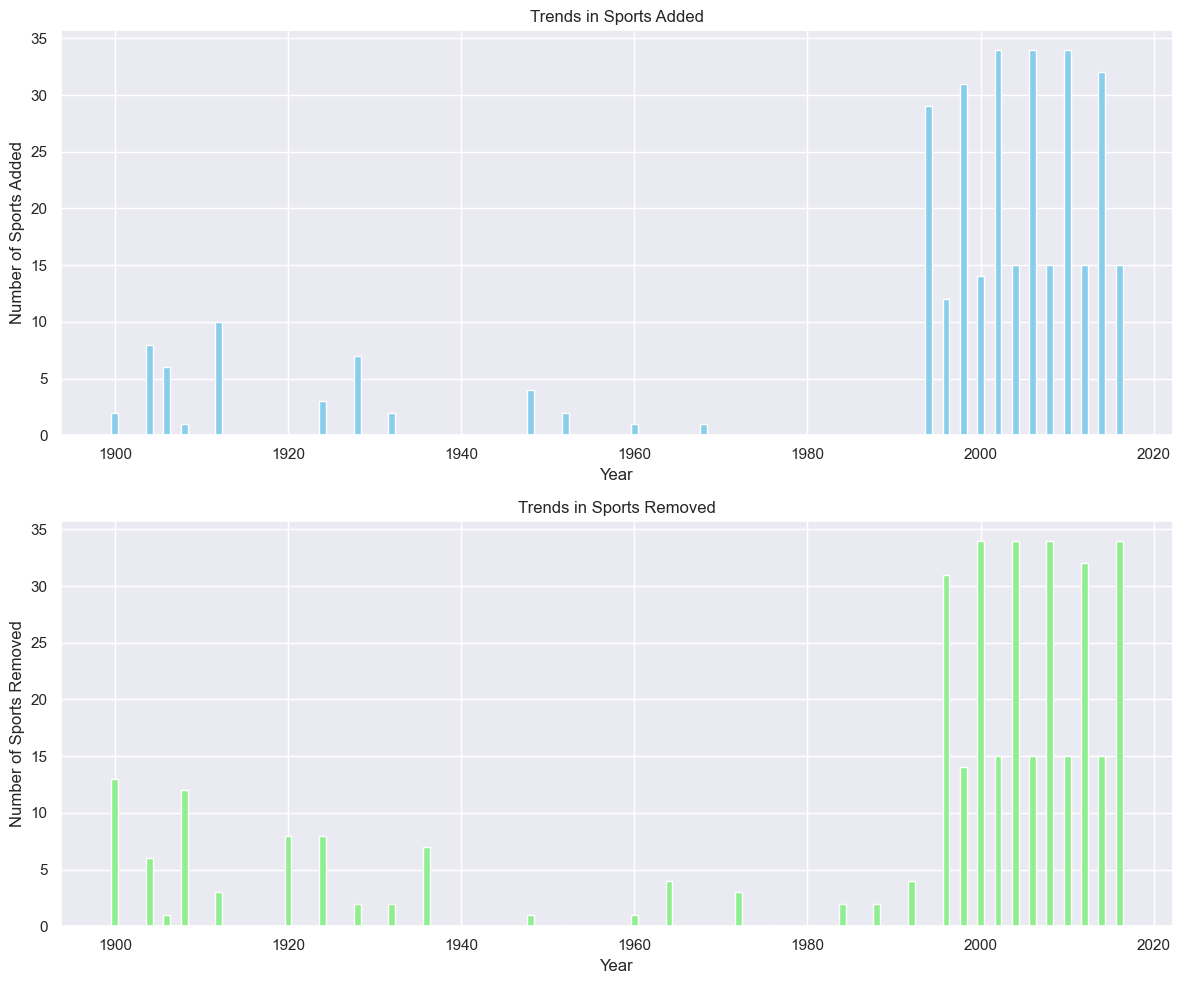

In [48]:
# Plot trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot trends in sports added
ax1.bar(sports_added.keys(), [len(sports) for sports in sports_added.values()], color='skyblue')
ax1.set_title('Trends in Sports Added')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sports Added')

# Plot trends in sports removed
ax2.bar(sports_removed.keys(), [len(sports) for sports in sports_removed.values()], color='lightgreen')
ax2.set_title('Trends in Sports Removed')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Sports Removed')

plt.tight_layout()
plt.show()

Trend of Sports Added: This indicates the number of new sports that were introduced to the Olympic program in each Olympic cycle (usually spanning four years). A higher number of sports added suggests that the International Olympic Committee (IOC) or the host country has decided to include new sports to diversify the Olympic program or to reflect the evolving interests of athletes and spectators.

Trend of Sports Removed: This indicates the number of sports that were removed from the Olympic program in each Olympic cycle. A higher number of sports removed suggests that certain sports have been deemed less popular or relevant by the IOC or the host country, leading to their exclusion from the Olympic program.

### Are there any athletes who have won medals in multiple sports?

In [256]:
# Group data by athlete and count unique sports
athlete_sports_counts = data.groupby('Name')['Sport'].nunique().reset_index()

# Filter athletes who have won medals in multiple sports
athletes_multiple_sports = athlete_sports_counts[athlete_sports_counts['Sport'] > 1]

# Print the athletes who have won medals in multiple sports
print("Athletes who have won medals in multiple sports:")
print(athletes_multiple_sports)

Athletes who have won medals in multiple sports:
                              Name  Sport
207     Abdel Aziz Fahmi El-Shafei      2
419                     Abdul Aziz      2
489            Abdul Rahman Khalid      2
495                   Abdul Rashid      2
502                   Abdul Rehman      2
...                            ...    ...
134213                mile Vercken      2
134304               ngelo Gammaro      2
134320                   ore Perii      2
134408               rni Sigursson      2
134686                     va Krti      2

[1657 rows x 2 columns]


### What are the most successful sports for each country in terms of total medals won? 

In [49]:
# Group data by country and sport, and calculate total medals won
country_sport_medals = data.groupby(['Team', 'Sport'])['Medal'].count().reset_index()

# Find the most successful sport for each country
most_successful_sports = country_sport_medals.loc[country_sport_medals.groupby('Team')['Medal'].idxmax()]

# Print the most successful sports for each country
print("Most successful sports for each country:")
most_successful_sports

Most successful sports for each country:


,Team,Sport,Medal
0,30. Februar,Sailing,0
1,A North American Team,Polo,4
2,Acipactli,Sailing,0
3,Acturus,Sailing,0
9,Afghanistan,Taekwondo,2
...,...,...,...
5174,Zambia,Athletics,1
5182,Zefyros,Sailing,0
5191,Zimbabwe,Hockey,15
5200,Zut,Sailing,3


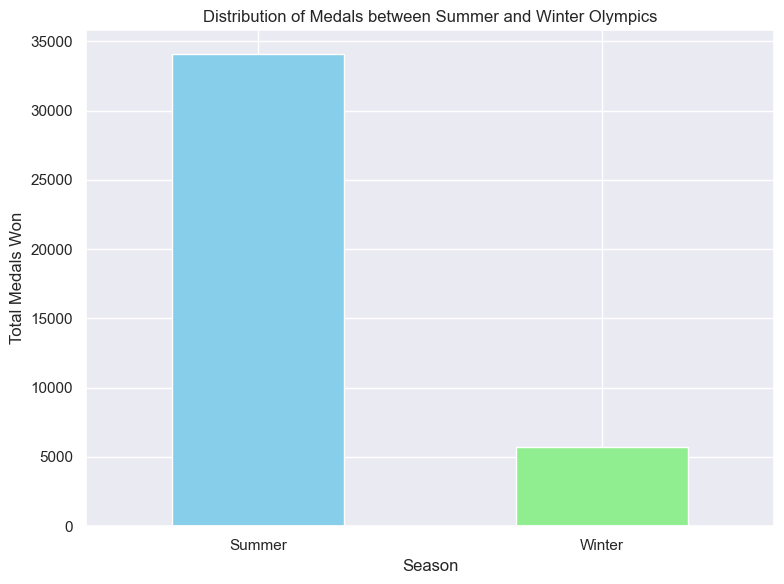

In [50]:

# Group data by season and calculate total medals won
season_medals = data.groupby('Season')['Medal'].count()

# Plot the results
plt.figure(figsize=(8, 6))
season_medals.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Season')
plt.ylabel('Total Medals Won')
plt.title('Distribution of Medals between Summer and Winter Olympics')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Summer olympics has more medal count than winter maybe because the participation level is also less in winter olympics

### Are there any countries that have consistently improved their medal count over the years?

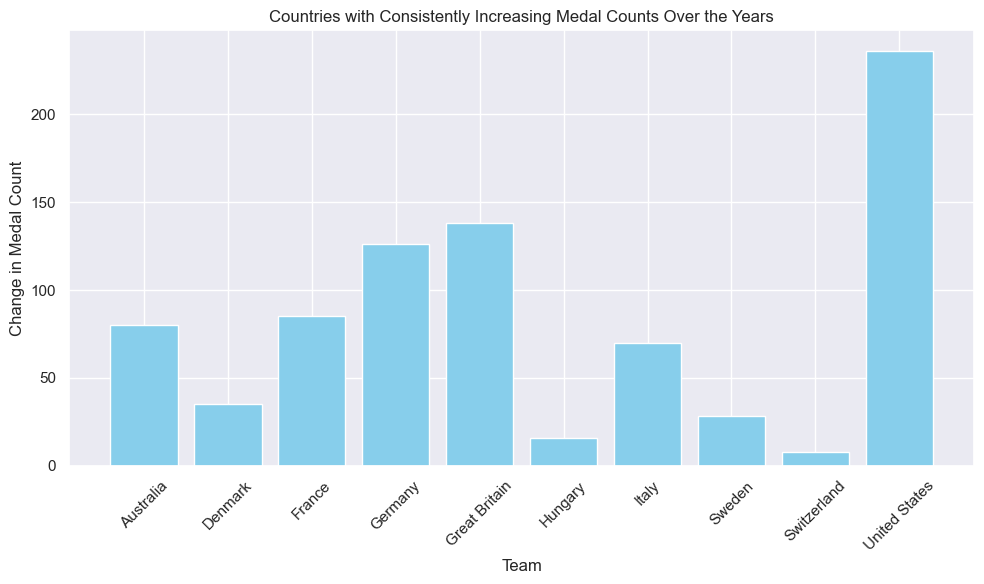

In [51]:
# Group data by country and year, and calculate total medals won
country_year_medals = data.groupby(['Team', 'Year'])['Medal'].count().reset_index()

# Calculate the total medals won by each country in the first and last years
initial_medals = country_year_medals[country_year_medals['Year'] == country_year_medals['Year'].min()]
final_medals = country_year_medals[country_year_medals['Year'] == country_year_medals['Year'].max()]

# Merge initial and final medal counts
medal_changes = pd.merge(initial_medals, final_medals, on='Team', suffixes=('_initial', '_final'))

# Calculate the change in medal count for each country
medal_changes['Change'] = medal_changes['Medal_final'] - medal_changes['Medal_initial']

# Filter countries with positive change in medal count
improving_countries = medal_changes[medal_changes['Change'] > 0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(improving_countries['Team'], improving_countries['Change'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Change in Medal Count')
plt.title('Countries with Consistently Increasing Medal Counts Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

United States showed a very consistent performance,and switzerland has less medal count

### What are the most common events in the Olympics?

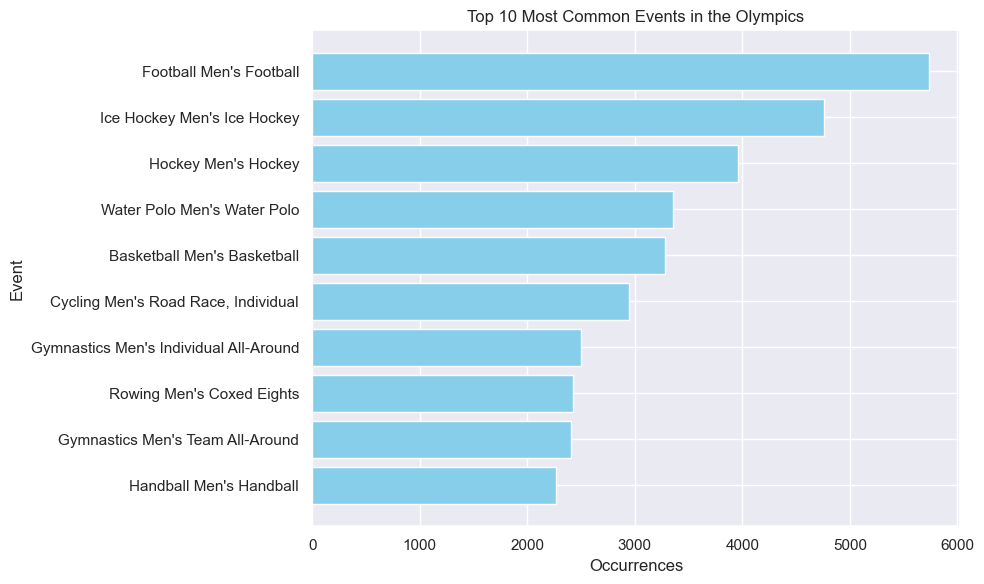

In [52]:
# Group data by event and calculate total occurrences
event_counts = data['Event'].value_counts().reset_index()
event_counts.columns = ['Event', 'Occurrences']

# Select the top N most common events (adjust as needed)
top_events = event_counts.head(10)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_events['Event'], top_events['Occurrences'], color='skyblue')
plt.xlabel('Occurrences')
plt.ylabel('Event')
plt.title('Top 10 Most Common Events in the Olympics')
plt.gca().invert_yaxis()  # Invert y-axis to display the most common event at the top
plt.tight_layout()
plt.show()

Conclusion: Men's football is most common event and men's handball event is less played